In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
import math
import axionDM3
import pyfftw
import os
import sys
import multiprocessing
import numpy
import numba
import h5py
from IPython.core.display import clear_output
%matplotlib inline

# Set Axion Mass

In [2]:
axion_mass = 1e-22 *1.783e-36 #kg

# Set units for soliton parameters
s_mass_unit = ''     #Accepted units: 'kg', 'solar_masses', 'M_solar_masses', and '' for dimensionless units as used in [1]
s_position_unit = '' #Accepted units: 'm', 'km', 'pc', 'kpc', 'Mpc', 'ly', and '' for dimensionless units as used in [1]
s_velocity_unit = '' #Accepted units: 'm/s', 'km/s', 'km/h', and '' for dimensionless units as used in [1]

# Set Simulation Parameters

In [5]:
# Set number of threads to target
num_threads = multiprocessing.cpu_count()
print(num_threads)

# Set box size and resolution
length=8 #1 code unit is ~38 kpc x (1e-22/m_a)^0.5
length_units = ''  #Accepted units: 'm', 'km', 'pc', 'kpc', 'Mpc', 'ly', and '' for dimensionless units as used in [1]

resol=128 #Note that for resol 128, the largest stable soliton mass is ~ 50 in code units 

# Set duration of simulation in given units

duration = 1.0 #1 code unit is ~70 Gyr (no rescaling with m_a)

duration_units = ''  #Accepted units: 's', 'yr', 'kyr', 'Myr', and '' for dimensionless units as used in [1]

start_time = 0.0 #Should be given in the same units as duration. That is start_time_units is assumed to be the same as duration_units

#central_mass = 2000.0 #1 code unit is ~2.3e6 M_sol (1e-22/m_a)^1.5
central_mass = 0.

# Set options for what to save, where to save, and in what format to save it

#Data to save
save_rho = False
save_psi = False
save_plane = True
save_energies = True
save_stability = True

#Formats to save to
hdf5 = False
npz = False
npy = True
#txt = False #doesn't work

save_number = 200     # Choose number of 'frames' to save. Note that, depending on resolution, this could require significant disk space.
save_path = 'TestOutput'  # Set output directory

save_options = [save_rho,save_psi,save_plane,save_energies,save_stability]

4


# Set Soliton Initial Conditions:

Manual initial conditions

In [6]:
# Set units for soliton parameters
#s_mass_unit = ''     #Accepted units: 'kg', 'solar_masses', 'M_solar_masses', and '' for dimensionless units as used in [1]
#s_position_unit = '' #Accepted units: 'm', 'km', 'pc', 'kpc', 'Mpc', 'ly', and '' for dimensionless units as used in [1]
#s_velocity_unit = '' #Accepted units: 'm/s', 'km/s', 'km/h', and '' for dimensionless units as used in [1]

#Format for soliton parameters:
# [ m, [x, y, z], [v_x, v_y, v_z], phase]    #Note: phase is expected in radians.

#soliton1 = [13, [1.5,-4,0], [0,50,0], 0]
#soliton2 = [2000, [0,0,0], [0,0,0], 0]
# ... Add more as required.

#solitons = [soliton1,soliton2]  #Add any further solitons to this list

# Randomly generate n solitons in the given mass, velocity and phase ranges in a gaussian distribution 
# eg v_range=[mean_v, sigma_v]

#solitons = axipy.rand_solitons(n=3, v_range= [1.0, 0.5], m_range=[1.0, 0.5], phase_range=[0, np.pi], length=20, length_unit = '')

Orbit

In [7]:
m = 20 #1 code unit is ~2.3e6 M_sol (1e-22/m_a)^1.5
r = 1 #1 code unit is ~38 kpc x (1e-22/m_a)^0.5
v= np.sqrt(central_mass/r)
#The above formula assumes that v, m, and r are all given in code units
#Because of file naming, problems arise if m or r are not given as integers

#Soliton parameters are mass, position, velocity and phase
# soliton1 = [m, [r,0,0], [0,-v,0], 0]
# soliton2 = [m, [0,r,0], [v,0,0], 0]
# soliton3 = [m, [r/np.sqrt(2),r/np.sqrt(2),0], [v/np.sqrt(2),-v/np.sqrt(2),0], 0]
soliton4 = [m, [r,0,0], [0,1.8,0], 0]
soliton5 = [m, [-r,0,0], [0,-1.8,0], 0]
solitons = [soliton4, soliton5]  #Add any further solitons to this list

#Note that the output files are always named according to the mass and radius of the first soliton in this list

Flyby

In [8]:
# m = 13
# r= 1.5
# v = 1.0

# soliton1 = [m, [r,-length*0.7,0], [0,v,0], 0]

# solitons = [soliton1]

Run

In [9]:
#evolve_jit=numba.jit(axionDM3.evolve)
#evolve_jit(central_mass, num_threads, length, length_units, resol, duration, duration_units, save_number, save_options, save_path, npz, npy, txt, hdf5, s_mass_unit, s_position_unit, s_velocity_unit, solitons)
axionDM3.evolve(central_mass, num_threads, length, length_units, resol, duration, duration_units, save_number, save_options, save_path, npz, npy, hdf5, s_mass_unit, s_position_unit, s_velocity_unit, solitons, start_time)



Complete.


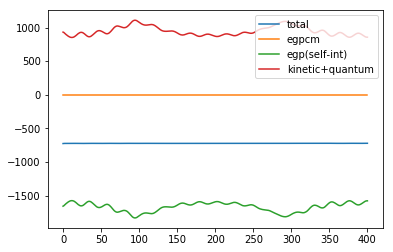

In [88]:
output_animated = 2# 0 for all contours plotted on a single graph, 1 for an animation in time, 2 for energy over time, 3 for line along axis of symmetry 
save_plots = 1 # 0 to just display contours without saving, 1 to save as well. 

if output_animated == 2:

    egylist = np.load('TestOutput/egylist.npy').tolist()
    egpcmlist = np.load('TestOutput/egpcmlist.npy').tolist()
    egpsilist = np.load('TestOutput/egpsilist.npy').tolist()
    ekandqlist = np.load('TestOutput/ekandqlist.npy').tolist()
    masslist = np.load('TestOutput/masslist.npy').tolist()
    plt.plot(egylist,label='total')
    plt.plot(egpcmlist,label='egpcm')
    plt.plot(egpsilist,label='egp(self-int)')
    plt.plot(ekandqlist,label='kinetic+quantum')
    plt.legend()
    plt.show()

if output_animated == 0:
    for x in np.arange(0,save_number+1,1):
        if x == 0:
            plt.contour(np.load('{}{}{}{}{}{}{}'.format('TestOutput/plane_r=',r,'_m=',m,'_#',x,'.npy')),colors='k')
        if x in np.arange(1,save_number+1,1):
            plt.contour(np.load('{}{}{}{}{}{}{}'.format('TestOutput/plane_r=',r,'_m=',m,'_#',x,'.npy')))
    if save_plots == 1:
        plt.savefig('{}{}{}{}{}'.format('./SavedPlots/r=', r, '_m=', m, '.eps'), format='eps', dpi=1000)


if output_animated == 1:        

    data = []
    for x in np.arange(0,save_number+1,1):
        data.append(np.load('{}{}{}{}{}{}{}'.format('TestOutput/plane_r=',r,'_m=',m,'_#',x,'.npy')))

    import warnings 
    warnings.filterwarnings("ignore")
    plt.ioff()
    fig,ax = plt.subplots(figsize=(20, 10))
    
    def animate(i):
        plt.clf()
        plot = plt.contourf(data[i])
        plt.axes().set_aspect('equal')
        plt.axes().get_xaxis().set_ticks([])
        plt.axes().get_yaxis().set_ticks([])
        plt.title('{}{}{}{}{}{}'.format('Duration: ', duration, ', Length: ', length, ', Soliton mass: ',m))
        
        
    interval = 0.15 #in seconds
    ani = matplotlib.animation.FuncAnimation(fig,animate,save_number+1,interval=interval*1e+3,blit=False)
    

    from IPython.display import HTML
    animated_plot = HTML(ani.to_jshtml())

    if save_plots == 1:  
        save_html = animated_plot.data
        with open('Animations/Animation.html', 'w') as f:
            f.write(save_html)

    display(animated_plot) 
    plt.close()    

        
if output_animated == 3:        

    data = []
    for x in np.arange(0,save_number+1,1):
        data.append(np.load('{}{}{}{}{}{}{}'.format('TestOutput/line_r=',r,'_m=',m,'_#',x,'.npy')))

    import warnings 
    warnings.filterwarnings("ignore")
    plt.ioff()
    fig,ax = plt.subplots()
    plt.axes().set_aspect('equal')
    
    def animate(i):
        plt.clf()
        plot = plt.plot(data[i])
#         plt.axes().set_aspect('equal')
#         plt.axes().get_xaxis().set_ticks([])
#         plt.axes().get_yaxis().set_ticks([])
#         plt.title('{}{}{}{}{}{}'.format('Duration: ', duration, ', Length: ', length, ', Soliton mass: ',m))
        
        
    interval = 0.15 #in seconds
    ani2 = matplotlib.animation.FuncAnimation(fig,animate,save_number+1,interval=interval*1e+3,blit=False)
    

    from IPython.display import HTML
    animated_plot2 = HTML(ani2.to_jshtml())

    if save_plots == 1:  
        save_html = animated_plot2.data
        with open('Animations/Animation2.html', 'w') as f:
            f.write(save_html)

#if output_animated == 1:
    display(animated_plot2) 

    plt.close()    
    
    
    
  